In [28]:
import numpy as np

def simulate_multitype_branching(num_simulations, s_driver, s_del, U, max_generations=10000, threshold=1e4):
    """
    Simulate a multitype branching process for a beneficial allele that is 
    subject to accumulating deleterious mutations.
    
    Parameters:
      - num_simulations: number of independent lineage simulations.
      - s_driver: the beneficial effect (e.g., from sexual antagonism or aneuploidy relief).
      - s_del: per-mutation deleterious cost (assumed multiplicative).
      - mu: probability per generation that an offspring acquires an extra deleterious mutation.
      - max_generations: maximum generations to simulate.
      - threshold: population size threshold to consider the allele as established.
      
    Returns:
      - survival_prob: estimated probability that the allele escapes early stochastic loss.
    """
    survival_count = 0

    for sim in range(num_simulations):
        # Start with one individual carrying 0 deleterious mutations.
        # Each element in the list represents a mutant individual as (k, count),
        # where k is the number of deleterious mutations.
        lineage = {(0): 1}
        extinct = False
        generation = 0

        while generation < max_generations:
            new_lineage = {}
            total_count = 0
            # Iterate over each mutation class.
            for k, count in lineage.items():
                # Fitness of individuals with k deleterious mutations:
                # Multiplicative fitness: beneficial effect times (1-s_del)^k.
                fitness = (1 + s_driver) * ((1 - s_del) ** k)
                # Assume each individual reproduces with a Poisson number of offspring.
                for i in range(count):
                    num_offspring = np.random.poisson(fitness)
                    for _ in range(num_offspring):
                        # With probability mu, the offspring gets one extra deleterious mutation.
                        new_k = k + 1 if np.random.rand() < U else k
                        new_lineage[new_k] = new_lineage.get(new_k, 0) + 1
                        total_count += 1
            generation += 1
            
            # If no offspring are produced, the lineage goes extinct.
            if total_count == 0:
                extinct = True
                break
            
            # Check if the lineage has reached a large enough size to be considered established.
            if total_count >= threshold:
                break
            
            lineage = new_lineage
        
        if not extinct and total_count >= threshold:
            survival_count += 1

    survival_prob = survival_count / num_simulations
    return survival_prob

# Example parameters:
num_simulations = 10000
s_driver = 0.1    # beneficial effect (e.g., 5% advantage)
s_del = 0     # deleterious cost per mutation (1% cost per mutation)
mu = (1e-9)
Gs = (2e+6)
U = mu*Gs

# Run the branching process simulation.
survival_prob = simulate_multitype_branching(num_simulations, s_driver, s_del, mu)
print("Estimated survival probability:", survival_prob)


Estimated survival probability: 0.1807


Running simulations
Gs: 2.0e+04, s_driver: 0.000, survival_prob: 0.0000
Gs: 2.0e+04, s_driver: 0.125, survival_prob: 0.1700
Gs: 2.0e+04, s_driver: 0.250, survival_prob: 0.3600
Gs: 2.0e+04, s_driver: 0.375, survival_prob: 0.5000
Gs: 2.0e+04, s_driver: 0.500, survival_prob: 0.6100
Gs: 2.4e+05, s_driver: 0.000, survival_prob: 0.0000
Gs: 2.4e+05, s_driver: 0.125, survival_prob: 0.1300
Gs: 2.4e+05, s_driver: 0.250, survival_prob: 0.3400
Gs: 2.4e+05, s_driver: 0.375, survival_prob: 0.5300
Gs: 2.4e+05, s_driver: 0.500, survival_prob: 0.5200
Gs: 4.6e+05, s_driver: 0.000, survival_prob: 0.0000
Gs: 4.6e+05, s_driver: 0.125, survival_prob: 0.1800
Gs: 4.6e+05, s_driver: 0.250, survival_prob: 0.4800
Gs: 4.6e+05, s_driver: 0.375, survival_prob: 0.4100
Gs: 4.6e+05, s_driver: 0.500, survival_prob: 0.5600
Gs: 6.8e+05, s_driver: 0.000, survival_prob: 0.0000
Gs: 6.8e+05, s_driver: 0.125, survival_prob: 0.2000
Gs: 6.8e+05, s_driver: 0.250, survival_prob: 0.4700
Gs: 6.8e+05, s_driver: 0.375, survival_prob:

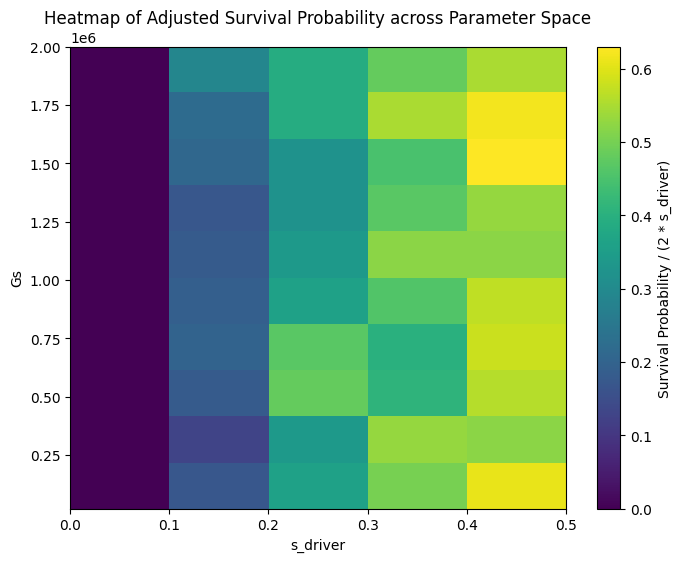

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_multitype_branching(num_simulations, s_driver, s_del, mu, max_generations=100000, threshold=1e5):
    """
    Simulate a multitype branching process for a beneficial allele that is 
    subject to accumulating deleterious mutations.
    
    Parameters:
      - num_simulations: number of independent lineage simulations.
      - s_driver: the beneficial effect.
      - s_del: per-mutation deleterious cost (assumed multiplicative).
      - mu: probability per generation that an offspring acquires an extra deleterious mutation.
      - max_generations: maximum generations to simulate.
      - threshold: population size threshold to consider the allele as established.
      
    Returns:
      - survival_prob: estimated probability that the allele escapes early stochastic loss.
    """
    survival_count = 0

    for sim in range(num_simulations):
        # Start with one individual carrying 0 deleterious mutations.
        lineage = {0: 1}
        extinct = False
        generation = 0

        while generation < max_generations:
            new_lineage = {}
            total_count = 0
            # Iterate over each mutation class.
            for k, count in lineage.items():
                # Fitness of individuals with k deleterious mutations:
                fitness = (1 + s_driver) * ((1 - s_del) ** k)
                # Each individual reproduces with a Poisson number of offspring.
                for i in range(count):
                    num_offspring = np.random.poisson(fitness)
                    for _ in range(num_offspring):
                        # With probability mu, the offspring gets one extra deleterious mutation.
                        new_k = k + 1 if np.random.rand() < mu else k
                        new_lineage[new_k] = new_lineage.get(new_k, 0) + 1
                        total_count += 1
            generation += 1
            
            # If no offspring are produced, the lineage goes extinct.
            if total_count == 0:
                extinct = True
                break
            
            # Check if the lineage has reached a large enough size to be considered established.
            if total_count >= threshold:
                break
            
            lineage = new_lineage
        
        if not extinct and total_count >= threshold:
            survival_count += 1

    survival_prob = survival_count / num_simulations
    return survival_prob

# Parameters for the simulation grid
num_simulations = 10000  # You can adjust the number of simulations as needed
s_del = 0.030           # deleterious cost per mutation
mu = 1e-8               # mutation probability per generation

# Parameter ranges
gs_min = 2e4
gs_max = 2e6
s_driver_min = 0.0
s_driver_max = 0.5

# Adjustable steps (change these as desired)
gs_steps = 100
s_driver_steps = 100

gs_values = np.linspace(gs_min, gs_max, gs_steps)
s_driver_values = np.linspace(s_driver_min, s_driver_max, s_driver_steps)

# Prepare a matrix to store the results.
# We'll store the ratio: survival_prob / (2 * s_driver).
# For s_driver = 0, we will set the ratio to np.nan to avoid division by zero.
results = np.empty((gs_steps, s_driver_steps))

print("Running simulations")

# Loop over parameter combinations
for i, Gs in enumerate(gs_values):
    U = mu * Gs  # This parameter U is defined but not used in the simulation function.
    for j, s_driver in enumerate(s_driver_values):
        # Run the simulation
        survival_prob = simulate_multitype_branching(num_simulations, s_driver, s_del, mu)
        results[i, j] = survival_prob
        print(f"Gs: {Gs:.1e}, s_driver: {s_driver:.3f}, survival_prob: {survival_prob:.4f}")

# Plot the heatmap
plt.figure(figsize=(8, 6))
# Using imshow to display the heatmap; origin='lower' so the smallest values are at the bottom left.
cax = plt.imshow(results, origin='lower', aspect='auto', 
                 extent=[s_driver_min, s_driver_max, gs_min, gs_max])
plt.colorbar(cax, label='Survival Probability / (2 * s_driver)')
plt.xlabel('s_driver')
plt.ylabel('Gs')
plt.title('Heatmap of Adjusted Survival Probability across Parameter Space')
plt.show()


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import pandas as pd

def simulate_multitype_branching(num_simulations, s_driver, s_del, mu, max_generations=100000, threshold=1e5):
    """
    Simulate a multitype branching process for a beneficial allele that is 
    subject to accumulating deleterious mutations.
    
    Parameters:
      - num_simulations: number of independent lineage simulations.
      - s_driver: the beneficial effect.
      - s_del: per-mutation deleterious cost (assumed multiplicative).
      - mu: probability per generation that an offspring acquires an extra deleterious mutation.
      - max_generations: maximum generations to simulate.
      - threshold: population size threshold to consider the allele as established.
      
    Returns:
      - survival_prob: estimated probability that the allele escapes early stochastic loss.
    """
    survival_count = 0

    for sim in range(num_simulations):
        lineage = {0: 1}
        extinct = False
        generation = 0

        while generation < max_generations:
            new_lineage = {}
            total_count = 0
            for k, count in lineage.items():
                fitness = (1 + s_driver) * ((1 - s_del) ** k)
                for i in range(count):
                    num_offspring = np.random.poisson(fitness)
                    for _ in range(num_offspring):
                        new_k = k + 1 if np.random.rand() < mu else k
                        new_lineage[new_k] = new_lineage.get(new_k, 0) + 1
                        total_count += 1
            generation += 1
            
            if total_count == 0:
                extinct = True
                break
            
            if total_count >= threshold:
                break
            
            lineage = new_lineage
        
        if not extinct and total_count >= threshold:
            survival_count += 1

    survival_prob = survival_count / num_simulations
    return survival_prob

# Function to run one simulation for a given pair of parameters.
def run_simulation(params):
    Gs, s_driver = params
    U = mu * Gs  # Computed if needed; not used in this simulation function.
    survival_prob = simulate_multitype_branching(num_simulations, s_driver, s_del, mu)
    return (Gs, s_driver, survival_prob)

# Simulation grid parameters
num_simulations = 10000  # number of simulations for each parameter combination
s_del = 0.030           # deleterious cost per mutation
mu = 1e-8               # mutation probability per generation

# Parameter ranges
gs_min = 2e4
gs_max = 2e6
s_driver_min = 0.0
s_driver_max = 0.5

# Adjustable steps (change these as desired)
gs_steps = 100
s_driver_steps = 100

gs_values = np.linspace(gs_min, gs_max, gs_steps)
s_driver_values = np.linspace(s_driver_min, s_driver_max, s_driver_steps)

if __name__ == '__main__':
    # Prepare the list of parameter combinations.
    param_list = [(Gs, s_driver) for Gs in gs_values for s_driver in s_driver_values]

    print("Running simulations in parallel using multiprocessing (4 cores)...")
    # Create a pool with 4 explicitly defined processes.
    with mp.Pool(processes=4) as pool:
        results_list = pool.map(run_simulation, param_list)

    # Convert results_list into a matrix.
    results = np.empty((gs_steps, s_driver_steps))
    for res in results_list:
        Gs, s_driver, survival_prob = res
        i = np.argmin(np.abs(gs_values - Gs))
        j = np.argmin(np.abs(s_driver_values - s_driver))
        results[i, j] = survival_prob
        print(f"Gs: {Gs:.1e}, s_driver: {s_driver:.3f}, survival_prob: {survival_prob:.4f}")

    # Save the results matrix to a CSV file
    df_results = pd.DataFrame(results, index=gs_values, columns=s_driver_values)
    df_results.to_csv("results.csv")
    print("Results saved to results.csv")

    # Plot the heatmap.
    plt.figure(figsize=(8, 6))
    cax = plt.imshow(results, origin='lower', aspect='auto', 
                     extent=[s_driver_min, s_driver_max, gs_min, gs_max])
    plt.colorbar(cax, label='Survival Probability')
    plt.xlabel('s_driver')
    plt.ylabel('Gs')
    plt.title('Heatmap of Survival Probability across Parameter Space')
    plt.show()


Running simulations in parallel using multiprocessing (4 cores)...


Process SpawnPoolWorker-4:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _Forki

KeyboardInterrupt: 